# HW 6: 自駕車周邊模組的控制與驅動 (計算機組織 / 作業系統概論 / 軟硬體整合)
2020.11.06

## Tutorial

 * [Digital versus Analog signals](https://www.youtube.com/watch?v=ubEijRkLweo&ab_channel=BillKleitz)
 * [Arduino vs. Raspberry Pi](https://www.youtube.com/watch?v=7vhvnaWUZjE&ab_channel=AddOhms)


## Objective

- 了解數位訊號與類比訊號的差別
- 了解紅外線模組的運作原理
- 培養軟硬體整合的能力
- 運用紅外線循跡模組，實作控制演算法

## Requirement

- 透過紅外線模組，使小鴨車對外界環境進行感測，實作簡單的控制演算法
- 使用 Arduino nano 作為開發平台，接收紅外線循跡模組的各項感測數位訊號，作為車輛在黑線循跡地圖上左彎、右彎、前行與停止的依據。


### Step 1

- 安裝 Arduino 開發軟體
    - [Arduino IDE](https://www.arduino.cc/en/software)
    - 根據你所使用的平台，選擇適當的選項安裝

### Step 2

- 將 Arduino Nano 透過 mini usb 傳輸線連接到筆電上
- 開啟 Arduino IDE，新增一個新的檔案
    - ![](https://i.imgur.com/S6x7jI0.png)
- 在上方 [工具] 選單中，將 `開發版` 選擇為 `Arduino Nano`
    - ![](https://i.imgur.com/fFmbhhw.png)
- 在上方 [工具] 選單中，將 `處理器` 選擇為 `ATmega328P (Old Bootloader)`
    - ![](https://i.imgur.com/h1EO5sz.png)
- 在上方 [工具] 選單中，將 `序列埠` 選擇為適當的 Serial Port
    - ![](https://i.imgur.com/CgswOHt.png)
    - 如何知道 Serial Port 是哪一個？
        - Windows
            - 左下角的 開始 點右鍵，選擇 裝置管理員
            - 找到 `連接埠 (COM 和 LPT)`，找到 `USB-SERIAL CH340 (COMx)`
            - 後方的 `COMx` 即為目標序列埠 (如下圖為 COM3)
            - ![](https://i.imgur.com/gqUwbNs.png)
        - Mac
            _ 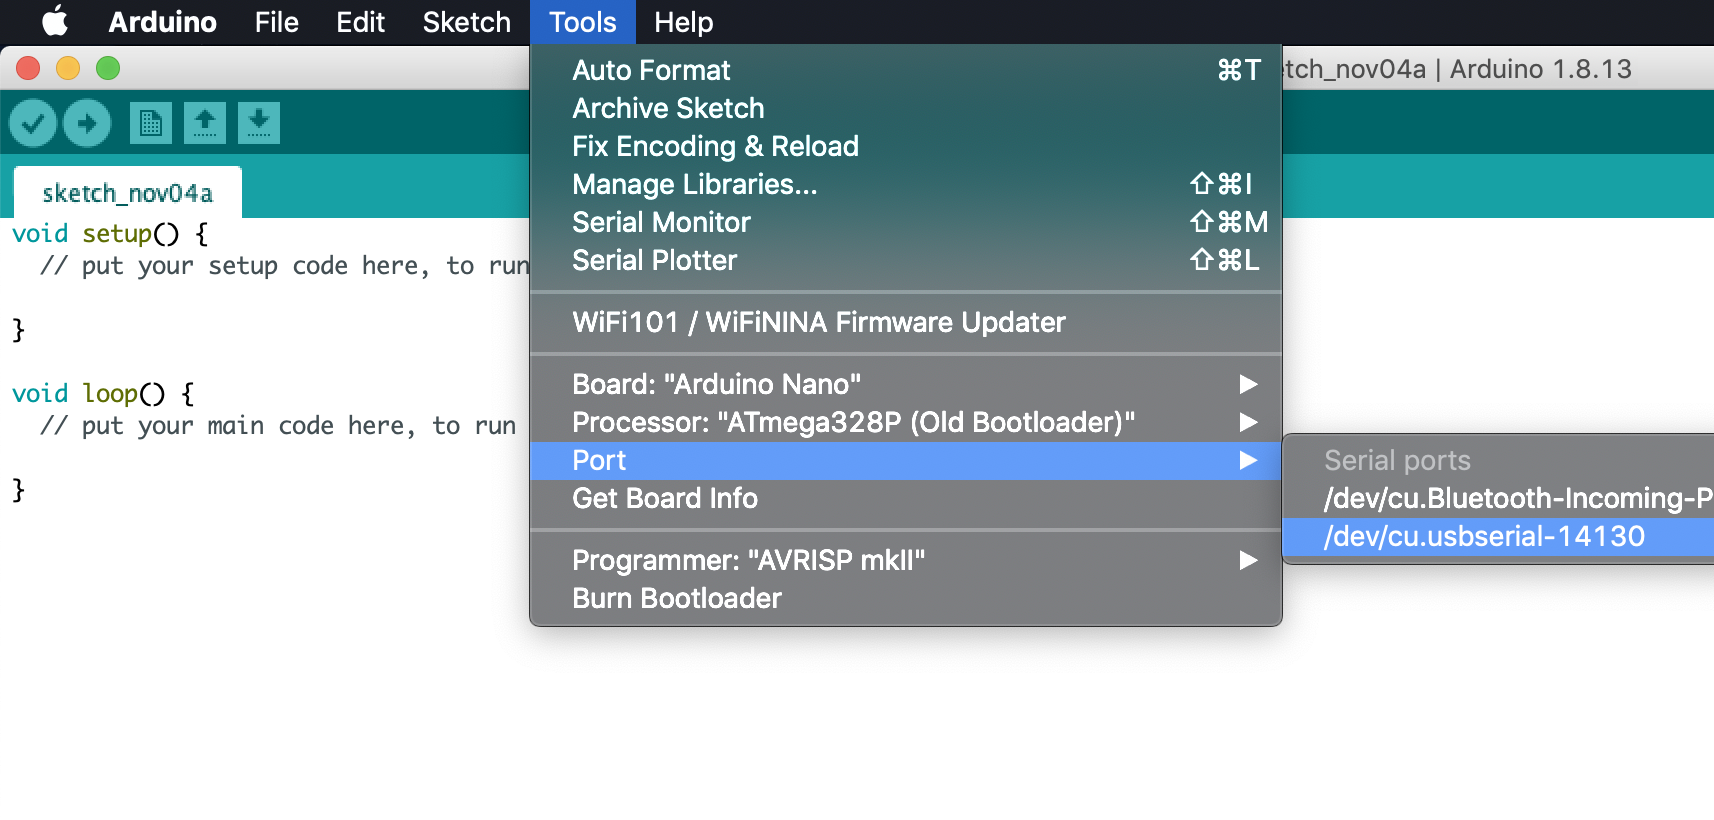


### Step 3

- 認識 Arduino Nano 腳位
    - ![](https://i.imgur.com/uHV5XOB.png)
    - 這次實驗，我們將透過 Arduino Nano 的 Digital Pins，獲取紅外線模組所接收到的訊號
    - 如上圖，在 Arduino Nano 中，可以使用的數位腳位為上圖紅色框框的部分
        - 有 `D2` ~ `D13` 以及 `A0` ~ `A5`，對應的 Pin number 為 `2` ~ `19`
        - 程式碼中，將會使用 Pin number，請同學對照使用
- 認識紅外線循跡模組腳位
    - 我們使用的模組是數位訊號 (only 0 and 1)
        - 當紅外線模組偵測到距離小於某個閥值時，訊號為 1
        - 當紅外線模組打到黑線時，相當於距離無限遠，因此訊號為 0
    - ![](https://i.imgur.com/7iZ99ZV.png)
    - ![](https://i.imgur.com/oatLK22.png)
- 範例接線
    - ![](https://i.imgur.com/Zode9W6.png)

### Step 4

- 請同學透過 `S1` ~ `S5`, `CLP` 與 `NEAR`，實作一個演算法，決定小鴨車該往哪裡走
    - 同學可以自己定義 Action Space (使用英文跟數字作為 action 的名稱)
        - Example 1: [`left`, `right`, `move`, `stop`]
        - Example 2:  [`smooth left`, `left`, `smooth right`, `right`, `fast move`, `move`, `stop`]
    - 寫出判斷式，並將對應的 Action 透過 Serial port 送出
        - Note: 每一個透過 Serial.print 送出的 Action 請在最後面加上 "\n"
            - Example: Serial.print("stop\n");
        - 下方程式碼示範透過 `S1`, `S5` 以及 `CLP` 訊號決定 Action

```c
#define S1 2
#define S5 6
#define CLP 7

void setup() {
    // set serial port baud rate as 9600
    Serial.begin(9600);

    // set S1 pin on Arduino Nano as input pin
    pinMode(S1, INPUT);
    // set S5 pin on Arduino Nano as input pin
    pinMode(S5, INPUT);
    // set CLP pin on Arduino Nano as input pin
    pinMode(CLP, INPUT);
    // remembet to setup other pin's mode as input if you use it
}

void loop() {
    // read sensor value
    int S1_value = digitalRead(S1);
    int S5_value = digitalRead(S5);
    int CLP_value = digitalRead(CLP);
    // decide which action to do corresponding to the sensor value
    // careful to choose to detect 0 or 1
    if (CLP_value == 1) {
        Serial.print("stop\n");
    } else if (S1_value == 0){
        Serial.print("left\n");
    } else if (S5_value == 0){
        Serial.print("right\n");
    } else {
        Serial.print("move\n");
    }
    // sleep for a while before the next decision
    delay(100);
}
```

### Step 5

- 燒錄程式碼到 Arduino Nano 中
    - 點選左上方的驗證，驗證程式碼可以編譯成功
        - ![](https://i.imgur.com/MNioS40.png)
        - 若編譯失敗，請閱讀下方 error message，或是貼到 New E3 討論區。
    - 點選左上方的上傳，將程式碼編譯並燒錄進 Arduino Nano
        - ![](https://i.imgur.com/uhFJASI.png)
        - 若上傳失敗，請回到 Step 2 檢查 `開發版` 、 `處理器` 以及 `序列埠` 是否設定正確

### Step 6

- 透過 Serial monitor 接收程式碼送出的訊號
    - 在上方 [工具] 選單中，點選 `序列埠監控視窗`
        - ![](https://i.imgur.com/CzKfitN.png)
    - 在序列埠監控視窗中，請確認視窗名稱為你的序列埠名稱，而右下角的 baud rate 為 9600
        - ![](https://i.imgur.com/SjIoERq.png)
    - 若運行正確，將會無限的偵測並印出燒到到 Arduino Nano 的程式碼對於 sensor value 進行判斷的結果

# [Important] 請同學透過 7 個 sensor value 寫一個『厲害的』黑線循跡演算法，這將會影響到 Challenge 6 小鴨車在路上行走的分數～

 * 同學可以在白紙上畫一條寬 3.6 公分的實心黑線，作為測試，或是使用助教提供的測試紙張
 * 紅外線循跡模組可以直接貼在紙面上做使用

## Reference

- [Arduino 基本指令真的好簡單](https://www.youtube.com/watch?v=TJ8IqbyuTu4&ab_channel=LazyTomatoLab%E6%87%B6%E7%95%AA%E8%8C%84%E5%B7%A5%E4%BD%9C%E5%AE%A4)
- [Operating Systems](https://www.youtube.com/watch?v=26QPDBe-NB8&ab_channel=CrashCourse)